<a href="https://colab.research.google.com/github/salomf/ICloudTest/blob/master/Herst_generic_analis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
### Import heplpers, utils, etc

import sys
sys.path.append('/content/gdrive/MyDrive/PHD')

import utils
import NII_utils

In [3]:
mri_array = NII_utils.load_nii_data("gdrive/MyDrive/PHD/sub-01_T1w.nii.gz")

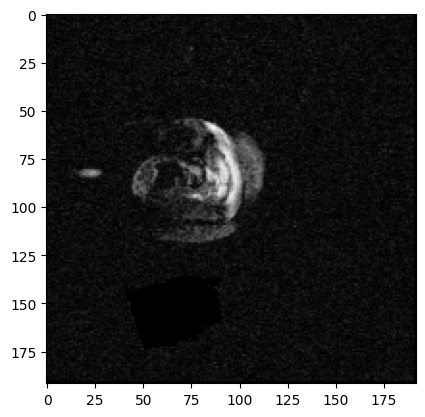

In [ ]:

NII_utils.generate_gif(mri_array)

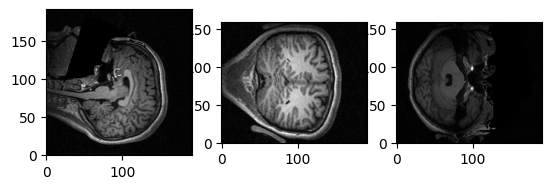

In [ ]:
NII_utils.show_random_slices(mri_array)

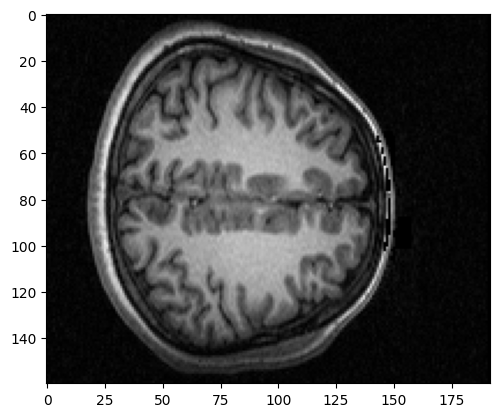

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
viewer = fig.add_subplot(1,1, 1)
plt.ion() # Turns interactive mode on (probably unnecessary)
fig.show() # Initially shows the figure

viewer.clear() # Clears the previous image
viewer.imshow(mri_array[:, :, 120], cmap='gray') # Loads the new image
plt.pause(.05) # Delay in seconds
fig.canvas.draw() # Draws the image to the screen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
slice =  mri_array[:, :, 120]
shape = slice.shape
shape

(160, 192)

In [ ]:
import numpy as np

bit_array = np.random.randint(0, 255, size=(100, 100))

bit_array

array([[ 54, 195, 164, ...,  38, 122,  15],
       [165,  26,  90, ..., 244,  16,  95],
       [162,  70, 228, ..., 119,  40,  51],
       ...,
       [220, 134,  98, ..., 231, 125,  24],
       [218, 155, 121, ...,  18, 161, 218],
       [148,  65, 161, ..., 101,  27, 136]])

In [ ]:
from typing_extensions import Self

class polar:
  distance: float
  angle: float
  value: int
  def __init__(self, distance, angle, value):
    self.distance = distance
    self.angle = angle
    self.value = value

  def pretty_printed(self):
    attrs = vars(self)
    print(', '.join("%s: %s" % item for item in attrs.items()))
  def print(self):
    attrs = vars(self)
    result = ""
    for item in attrs.items():
      result+=f"{item[0]}: {item[1]:.3f}\t"
    print(result)

In [ ]:
def decart_to_pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol_to_decart(distance, angle):
    x = distance * np.cos(angle)
    y = distance * np.sin(angle)
    return(x, y)

In [ ]:
def array_to_polar(array):
  result_list = []
  for i in range(0, array.shape[0]):
    for j in range(0, array.shape[1]):
      obj = polar(decart_to_pol(i,j)[0], decart_to_pol(i,j)[1], array[i,j])
      result_list.append(obj)
  sorted_list = sorted(result_list, key=lambda x: x.distance, reverse=False)

  return sorted_list


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def func(n, H):
    return n**(-H)

def hurst_exponent(timeseries):
    N = len(timeseries)
    n_min=20
    RS = []
    n_val = []
    for i in range(n_min,N):
        R = max(timeseries[:i]) - min(timeseries[:i])
        S = np.std(timeseries[:i])
        RS.append(R/S)
        n_val.append(i)

    n_val_log = np.log10(n_val)
    RS_log = np.log10(RS)
    poly = np.polyfit(n_val_log, RS_log, 1)
    H = poly[0] #Hurst

    plt.plot(n_val_log, RS_log, label='R/S')
    plt.plot(n_val_log, poly[0]*n_val_log + poly[1], 'r-', label='fit: H=%5.3f' % poly[0])
    plt.xlabel('log(n)')
    plt.ylabel('log(R/S)')
    plt.legend()
    plt.show()

    return H

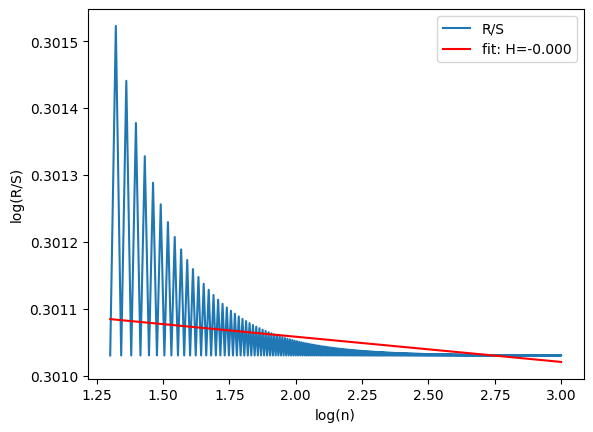

-3.7709582628026554e-05

In [ ]:
timeseries = []#= np.random.randn(1000)
for i in range(0,1000):
  val = 1 + (-0.01 if i%2 else 0.01)
  timeseries.append(val)

hurst_exponent(timeseries)

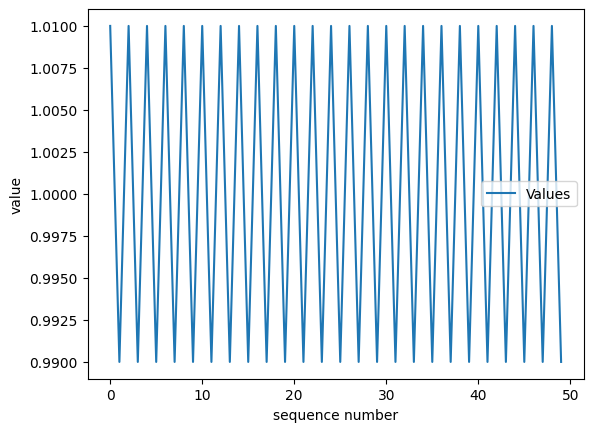

In [ ]:
plt.plot(timeseries[:50], label='Values')
plt.xlabel('sequence number')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy import stats

def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    # Return the Hurst exponent from the polyfit output

    return poly[0]*2.0


# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = np.log(np.cumsum(np.random.randn(100000))+1000)
mr = np.log(np.random.randn(100000)+1000)
tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series

print("Hurst(GBM):   ", hurst(gbm))
print("Hurst(MR):    ", hurst(mr))
print("Hurst(TR):    ", hurst(tr))


Hurst(GBM):    0.4992883522435039
Hurst(MR):     -0.00014896225924840574
Hurst(TR):     0.9551401147483447


In [ ]:
pip install hurst

In [ ]:
# "%s: %s" % item for item in sorted_list:
slice1 =  mri_array[:, :, 100]
values_only = []
sorted_list = array_to_polar(slice1)

for index in range(0, len(sorted_list)):
  values_only.append(sorted_list[index].value)

In [ ]:
for item in sorted_list[:10]:
  item.print()

distance: 0.000	angle: 0.000	value: 17.000	
distance: 1.000	angle: 1.571	value: 2.000	
distance: 1.000	angle: 0.000	value: 20.000	
distance: 1.414	angle: 0.785	value: 4.000	
distance: 2.000	angle: 1.571	value: 6.000	
distance: 2.000	angle: 0.000	value: 3.000	
distance: 2.236	angle: 1.107	value: 12.000	
distance: 2.236	angle: 0.464	value: 6.000	
distance: 2.828	angle: 0.785	value: 9.000	
distance: 3.000	angle: 1.571	value: 13.000	


Hurst(polaris coordinatus):     -0.0007305092749380157


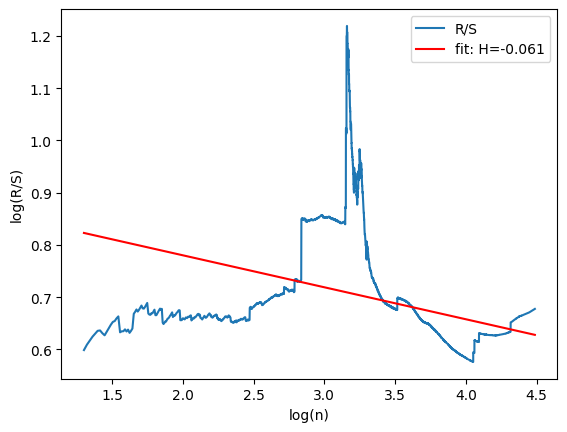

Another Herst -0.061188993189045714


In [ ]:
print("Hurst(polaris coordinatus):    ", hurst(values_only))
print("Another Herst", hurst_exponent(values_only))

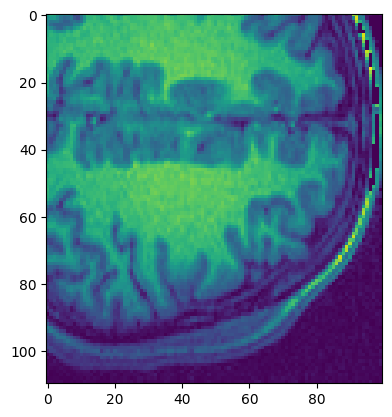

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(slice[50:200, 50:150], interpolation='none')
plt.show()

In [ ]:
values_only = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

In [ ]:
from hurst import compute_Hc, random_walk
import numpy as np

slice_count = mri_array.shape[2]
results = []
for slice_index in range(0, slice_count-1):
  slice =  mri_array[:, :, slice_index]
  values_only = []
  sorted_list = array_to_polar(slice)

  for index in range(0, len(sorted_list)):
    values_only.append(sorted_list[index].value)
  series = np.array(values_only)
  H, c, data = compute_Hc(series, simplified=True)

  results.append(H)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


FloatingPointError: invalid value encountered in scalar divide

In [ ]:
results, mri_array.shape[2]

([0.25706625025090185,
  0.19738513845367478,
  0.1959652651905742,
  0.18150672984751232,
  0.17577621562823084,
  0.158356298197475,
  0.17408483575770345,
  0.18710449881725746,
  0.17623103017298603,
  0.1630634939711541,
  0.1633862859850973,
  0.16516367379526406,
  0.16249566653577904,
  0.17472728382604874,
  0.16905839621270533,
  0.16183785590095723,
  0.15979207418727,
  0.16472614069687708,
  0.17237773125910774,
  0.16725301357649044,
  0.16482786785353923,
  0.16255565912833997,
  0.16489033605614203,
  0.16177008280395258,
  0.1620151934590575,
  0.16352895509148524,
  0.16584682135501344,
  0.15935475523144768,
  0.15297038941355698,
  0.15820932313605776,
  0.16093357684178833,
  0.16008856043755737,
  0.16538682439414676,
  0.16198716564902102,
  0.16571282870354132,
  0.1662892113800122,
  0.16484698999965075,
  0.16238992574894565,
  0.1601837658556737,
  0.1595920055252883,
  0.15974402682090247,
  0.160237811727216,
  0.1565247177271688,
  0.15909773569214777,
  0

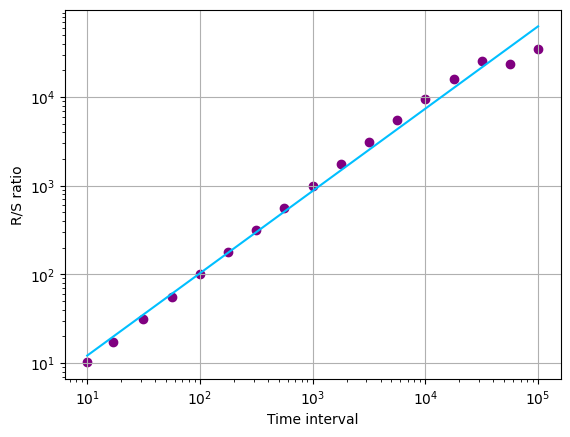

H=0.9293, c=1.4235


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
# np.random.seed(42)
# random_changes = 1. + np.random.randn(99999) / 1000.
# series = np.cumprod(random_changes)  # create a random walk from random changes

series = np.array(values_only)
# Evaluate Hurst equation
H, c, data = compute_Hc(series, simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
print(series.shape)
print((np.array(values_only)).shape)